<a href="https://colab.research.google.com/github/Farhan-Karim/Data-Science/blob/main/Goverment_Employee_per_province_data_science_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('/content/provincial-number-of-government-employees-by-grade-and-sex.csv')
data.head()

,Year,Province,Grade,Male,Female,Unnamed: 5
0,2010,Punjab,1,8580,488,NaN
1,2010,Punjab,2,5321,465,NaN
2,2010,Punjab,3,1816,155,NaN
3,2010,Punjab,4,1739,735,NaN
4,2010,Punjab,5,3333,53,NaN


In [ ]:
data = data.drop('Unnamed: 5', axis = 1)

In [ ]:
data['Province'].unique()

array(['Punjab', 'Sindh', 'KPK', 'Balochistan', 'Gilgit-Baltistan'],
      dtype=object)

In [ ]:
data = data.dropna()

In [ ]:
data['Male'] = pd.to_numeric(data['Male'], errors = 'coerce')
data['Female'] = pd.to_numeric(data['Female'], errors = 'coerce')
data['Year'] = pd.to_datetime(data['Year'], format = '%Y', errors = 'coerce')
data.head()


,Year,Province,Grade,Male,Female
0,2010-01-01,Punjab,1,8580.0,488.0
1,2010-01-01,Punjab,2,5321.0,465.0
2,2010-01-01,Punjab,3,1816.0,155.0
3,2010-01-01,Punjab,4,1739.0,735.0
4,2010-01-01,Punjab,5,3333.0,53.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 848
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      704 non-null    datetime64[ns]
 1   Province  704 non-null    object        
 2   Grade     704 non-null    int64         
 3   Male      704 non-null    float64       
 4   Female    704 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 33.0+ KB


In [ ]:
data['Female'] = data['Female'].astype(int)
data['Male'] = data['Male'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 848
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Year      704 non-null    datetime64[ns]
 1   Province  704 non-null    object        
 2   Grade     704 non-null    int64         
 3   Male      704 non-null    int64         
 4   Female    704 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 33.0+ KB


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of Goverment Employees by Grade')

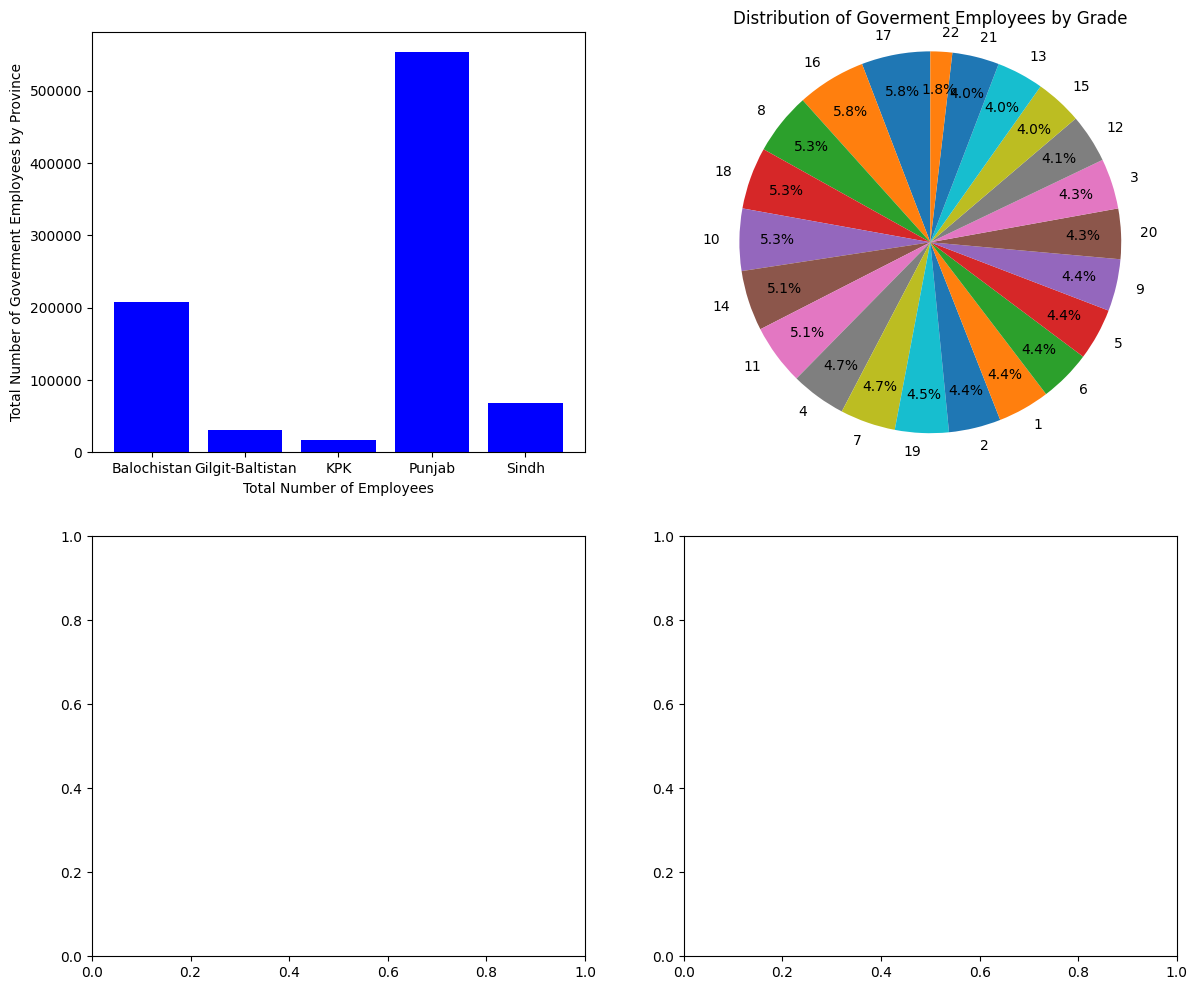

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
total_employees_by_province = data.groupby('Province')[['Male', 'Female']].sum().sum(axis = 1)
axes[0, 0].bar(total_employees_by_province.index, total_employees_by_province.values, color = 'blue')
axes[0, 0].set_xlabel('Total Number of Employees')
axes[0, 0].set_ylabel('Total Number of Goverment Employees by Province')

grade_counts = data['Grade'].value_counts()
axes[0,1].pie(grade_counts, labels=grade_counts.index, autopct = ('%1.1f%%'), radius = 2, startangle = 90, pctdistance = 0.8)
axes[0,1].axis('equal')
axes[0,1].set_title('Distribution of Goverment Employees by Grade')
